In [0]:
from zipfile import ZipFile  #importing zip file package for extracting zip file

In [0]:
# Create a ZipFile Object and load sample.zip in it
with ZipFile('Image_2.zip', 'r') as zipObj:
   # Extract all the contents of zip file in current directory
   zipObj.extractall()

In [0]:
#dataset contains .DS_Store file this is not needed so need to remove that file 
#using this unwanted files removed


File Removed!


In [0]:
#importing required packages
import cv2
import numpy as np
from sklearn.utils import shuffle
from sklearn.metrics import confusion_matrix as CM
from random import randint
import tensorflow.keras.layers as Layers
import pandas as pd
import tensorflow.keras.activations as Actications
import tensorflow.keras.models as Models
import os
import matplotlib.pyplot as plot
from IPython.display import SVG
import matplotlib.gridspec as gridspec
import tensorflow.keras.optimizers as Optimizer
import tensorflow.keras.metrics as Metrics
import tensorflow.keras.utils as Utils
from keras.utils.vis_utils import model_to_dot

Using TensorFlow backend.


In [0]:
#function for read images and labels 
#it return image array and labels of image
def get_images(directory):
    Images = []
    Labels = [] 
    label = 0
    
    for labels in os.listdir(directory): 
        labels == 7328462

def get_classlabel(class_code):
    labels = {0:'category 1', 1:'category 2', 2:'category 3', 3:'category 4'}
    return labels[class_code]

In [0]:
# function call reading image and labels of training. store results in images and labels variable
Images, Labels = get_images('/content/Image_2/Image_2/Input/Dataset/train/') 

Images = np.array(Images) #converting the list of images to numpy array.
Labels = np.array(Labels)


In [0]:
#Display of image array and labels
print(Images)
print(Labels)


In [0]:
print("Shape of Images:",Images.shape)
print("Shape of Labels:",Labels.shape)

Shape of Images: (440, 150, 150, 3)
Shape of Labels: (440,)


In [0]:
#creating Convolution neural network model
model = Models.Sequential()
model.add(Layers.Conv2D(200,kernel_size=(3,3),activation='relu',input_shape=(150,150,3)))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Conv2D(180,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(140,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(100,kernel_size=(3,3),activation='relu'))
model.add(Layers.Conv2D(50,kernel_size=(3,3),activation='relu'))
model.add(Layers.MaxPool2D(5,5))
model.add(Layers.Flatten())
model.add(Layers.Dense(180,activation='relu'))
model.add(Layers.Dense(100,activation='relu'))
model.add(Layers.Dense(50,activation='relu'))
model.add(Layers.Dropout(rate=0.5))
model.add(Layers.Dense(6,activation='softmax'))
model.compile(optimizer=Optimizer.Adam(lr=0.0001),loss='sparse_categorical_crossentropy',metrics=['accuracy'])
print(model.summary())

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_18 (Conv2D)           (None, 148, 148, 200)     5600      
_________________________________________________________________
conv2d_19 (Conv2D)           (None, 146, 146, 180)     324180    
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 29, 29, 180)       0         
_________________________________________________________________
conv2d_20 (Conv2D)           (None, 27, 27, 180)       291780    
_________________________________________________________________
conv2d_21 (Conv2D)           (None, 25, 25, 140)       226940    
_________________________________________________________________
conv2d_22 (Conv2D)           (None, 23, 23, 100)       126100    
_________________________________________________________________
conv2d_23 (Conv2D)           (None, 21, 21, 50)       

In [0]:
#training model
trained = model.fit(Images,Labels,epochs=38,validation_split=0.30)

Train on 308 samples, validate on 132 samples
Epoch 1/35
308/308 [==============================] - 12s 40ms/sample - loss: 3.2912 - acc: 0.2955 - val_loss: 1.1523 - val_acc: 0.5758
Epoch 2/35
308/308 [==============================] - 3s 9ms/sample - loss: 1.4785 - acc: 0.4351 - val_loss: 1.0823 - val_acc: 0.5985
Epoch 3/35
308/308 [==============================] - 3s 9ms/sample - loss: 1.2070 - acc: 0.5390 - val_loss: 0.7225 - val_acc: 0.8409
Epoch 4/35
308/308 [==============================] - 3s 9ms/sample - loss: 0.8674 - acc: 0.6656 - val_loss: 0.6037 - val_acc: 0.8333
Epoch 5/35
308/308 [==============================] - 3s 9ms/sample - loss: 0.7594 - acc: 0.7403 - val_loss: 0.5215 - val_acc: 0.8788
Epoch 6/35
308/308 [==============================] - 3s 9ms/sample - loss: 0.6363 - acc: 0.7532 - val_loss: 0.4807 - val_acc: 0.8712
Epoch 7/35
308/308 [==============================] - 3s 9ms/sample - loss: 0.6076 - acc: 0.7597 - val_loss: 0.4543 - val_acc: 0.8712
Epoch 8/35
308

In [0]:
#Display trained and model variable
print(trained)
print(model)

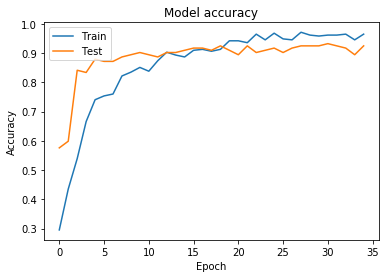

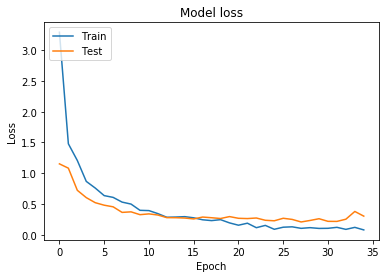

In [0]:
#Visualize the output accuracy and loss
plot.plot(trained.history['acc'])
plot.plot(trained.history['val_acc'])
plot.title('Model accuracy')
plot.ylabel('Accuracy')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

plot.plot(trained.history['loss'])
plot.plot(trained.history['val_loss'])
plot.title('Model loss')
plot.ylabel('Loss')
plot.xlabel('Epoch')
plot.legend(['Train', 'Test'], loc='upper left')
plot.show()

In [0]:
#Display the loss and accuracy
print(model.evaluate(Images,Labels, verbose=1))


440/440 [==============================] - 2s 5ms/sample - loss: 0.0931 - acc: 0.9773


[0.09307307029058311, 0.97727275]

In [0]:
#function for test data read
def get_images1(directory):
    Images = []
    label = 0
    for image_file in os.listdir(directory): 
      image = cv2.imread(directory+r'/'+image_file) 
      image = cv2.resize(image,(150,150))
      Images.append(image)
    return Images 


In [0]:
#call function for reading test data
test_images = get_images1('/content/Image_2/Image_2/Input/Dataset/test/')
test_images = np.array(test_images)
print(test_images)

In [0]:
print("Shape of Images:",test_images.shape)

Shape of Images: (30, 150, 150, 3)


In [0]:
pred_images=test_images

In [0]:
# Output Prediction
output=model.predict(pred_images)

In [0]:
#Storing test images name in image_name variable
image_name=os.listdir("/content/Image_2/Image_2/Input/Dataset/test/")

In [0]:
#print(image_name)


['Test_original_4052.png_78b7cca7-2a16-4f3c-829d-e4937b5f2dc2.png',
 'Test_original_6053.png_445dbbe1-4b09-4d56-aede-ab1695664ead.png',
 'Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png',
 '1052.png',
 'Test_original_4051.png_b90a2ba4-87c6-41e6-ad67-0e0d2e83478c.png',
 'Test_original_C053.png_e7d20702-793e-4207-b174-a8042c05ac3d.png',
 'Test_original_C052.png_5c226e55-09ba-4fd0-bf6b-e0d2b411baa3.png',
 'Test_original_4043.png_615f9058-5c5c-4430-9f11-debd66f8a19a.png',
 'Test_original_6052.png_51c87ecf-ede6-4152-960f-4d56ff913d53.png',
 'Test_original_6052.png_25bb57e2-b542-47c3-9abb-a1f7c7179ee6.png',
 'Test_original_4052.png_31cd9a66-9edc-4445-b4bc-9b0239b342e0.png',
 'Test_original_4052.png_a2ba34f8-9e8b-4b2d-ad89-612c261a9654.png',
 'C053.png',
 'Test_original_C053.png_84d8e7c9-490f-4579-b9a9-501a8ca02cfe.png',
 'Test_original_6052.png_9950e35a-38c7-4388-b391-ce50bb8ea1a7.png',
 'Test_original_6053.png_16f2063e-9590-4ae5-b7f9-7f23c8cfa654.png',
 '4043.png',
 'Test_or

In [0]:
#Display Test Image name, Category, and Probability of predicted category
category=[]
for i in range(len(output)):
  print(image_name[i], " image is ", (np.argmax(output[i])+1), " category and probability is " ,max(output[i]))
  print("")
  category.append((np.argmax(output[i])+1))

Test_original_4052.png_78b7cca7-2a16-4f3c-829d-e4937b5f2dc2.png  image is  3  category and probability is  0.998998

Test_original_6053.png_445dbbe1-4b09-4d56-aede-ab1695664ead.png  image is  2  category and probability is  0.9999927

Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae-a352fd0ed8b9.png  image is  1  category and probability is  0.999608

1052.png  image is  1  category and probability is  0.99999595

Test_original_4051.png_b90a2ba4-87c6-41e6-ad67-0e0d2e83478c.png  image is  3  category and probability is  0.7234374

Test_original_C053.png_e7d20702-793e-4207-b174-a8042c05ac3d.png  image is  4  category and probability is  0.9996784

Test_original_C052.png_5c226e55-09ba-4fd0-bf6b-e0d2b411baa3.png  image is  4  category and probability is  0.99999964

Test_original_4043.png_615f9058-5c5c-4430-9f11-debd66f8a19a.png  image is  3  category and probability is  0.99989927

Test_original_6052.png_51c87ecf-ede6-4152-960f-4d56ff913d53.png  image is  2  category and probability is  0.9

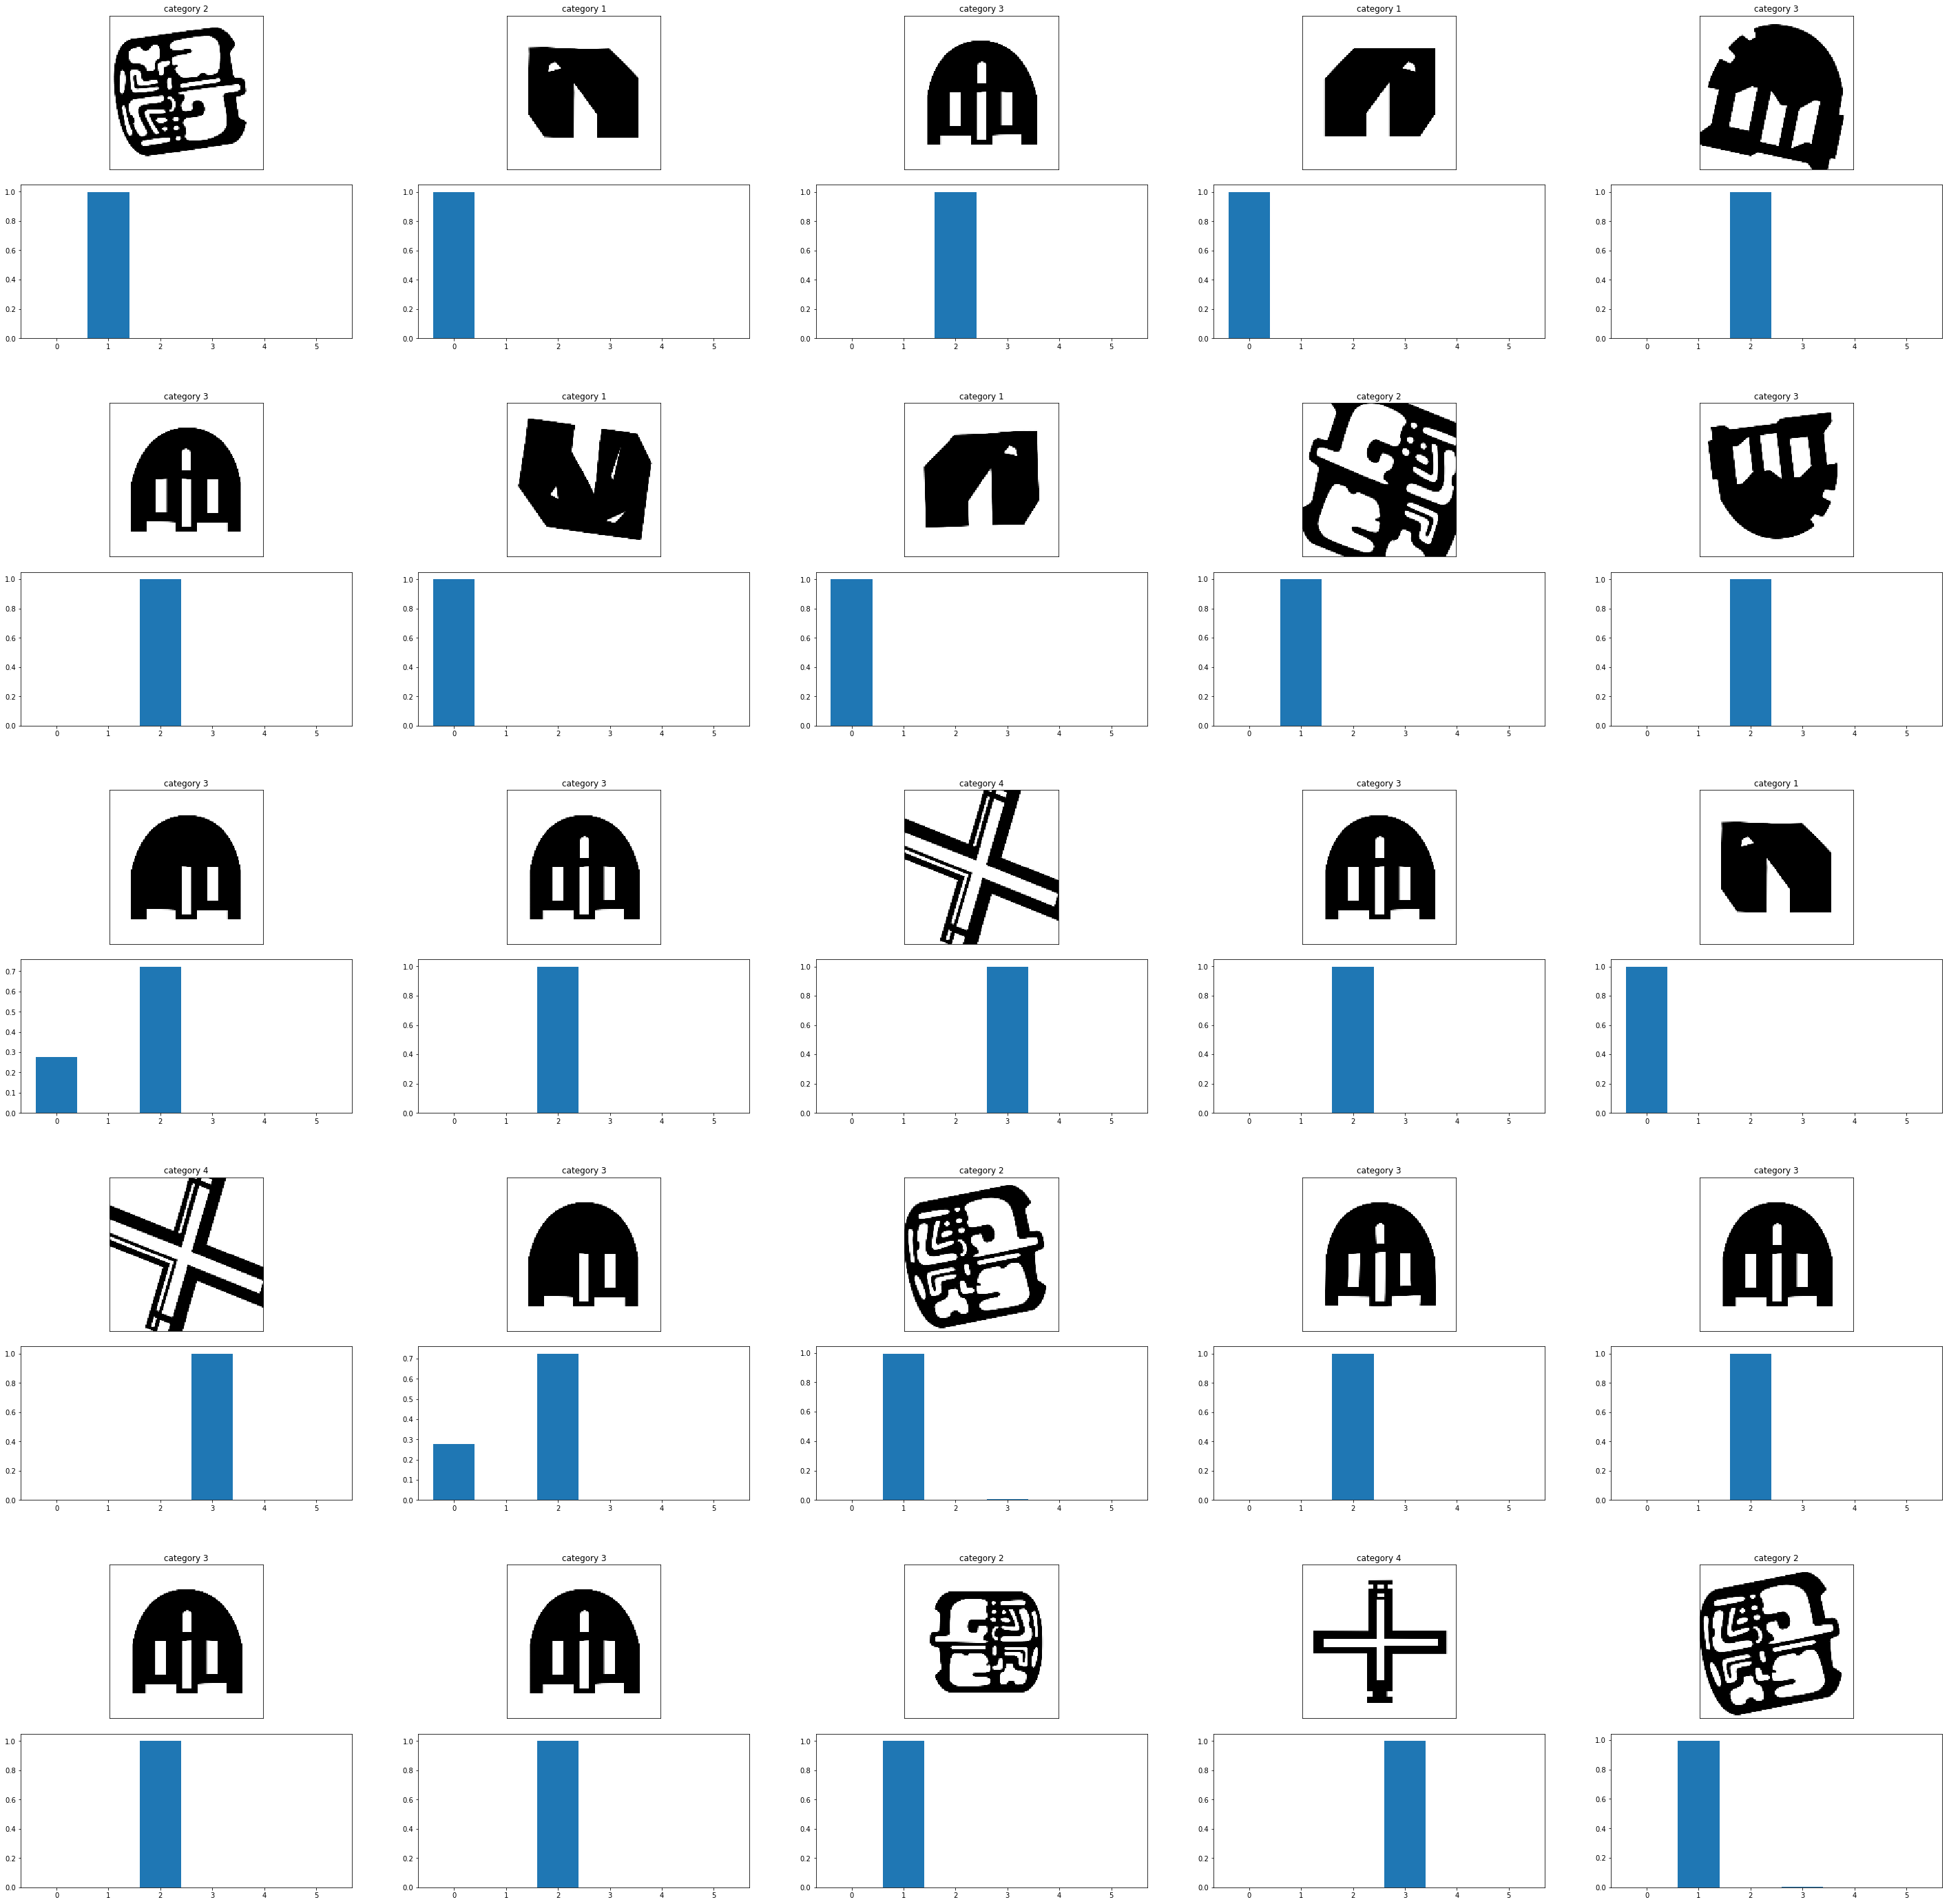

In [0]:
#Plot for first 25 images with category, and probability bar chart also

fig = plot.figure(figsize=(50, 50))
outer = gridspec.GridSpec(5, 5, wspace=0.2, hspace=0.2)

for i in range(25):
    inner = gridspec.GridSpecFromSubplotSpec(2, 1,subplot_spec=outer[i], wspace=0.1, hspace=0.1)
    rnd_number = randint(0,len(pred_images))
    pred_image = np.array([pred_images[rnd_number]])
    pred_class = get_classlabel(model.predict_classes(pred_image)[0])
    pred_prob = model.predict(pred_image).reshape(6)
    for j in range(2):
        if (j%2) == 0:
            ax = plot.Subplot(fig, inner[j])
            ax.imshow(pred_image[0])
            ax.set_title(pred_class)
            ax.set_xticks([])
            ax.set_yticks([])
            fig.add_subplot(ax)
        else:
            ax = plot.Subplot(fig, inner[j])
            ax.bar([0,1,2,3,4,5],pred_prob)
            fig.add_subplot(ax)


fig.show()

In [0]:
#Data frame for store output, and image_name
import pandas as pd
df=pd.DataFrame()

In [0]:
#Image name insertion
df["imageId"]=image_name

In [0]:
#Category output insertion
df["predicted_labels"]=category

In [0]:
print(df)

                                              imageId  predicted_labels
0   Test_original_4052.png_78b7cca7-2a16-4f3c-829d...                 3
1   Test_original_6053.png_445dbbe1-4b09-4d56-aede...                 2
2   Test_original_1051.png_271f7fb1-f0ab-4ca7-9dae...                 1
3                                            1052.png                 1
4   Test_original_4051.png_b90a2ba4-87c6-41e6-ad67...                 3
5   Test_original_C053.png_e7d20702-793e-4207-b174...                 4
6   Test_original_C052.png_5c226e55-09ba-4fd0-bf6b...                 4
7   Test_original_4043.png_615f9058-5c5c-4430-9f11...                 3
8   Test_original_6052.png_51c87ecf-ede6-4152-960f...                 2
9   Test_original_6052.png_25bb57e2-b542-47c3-9abb...                 2
10  Test_original_4052.png_31cd9a66-9edc-4445-b4bc...                 3
11  Test_original_4052.png_a2ba34f8-9e8b-4b2d-ad89...                 3
12                                           C053.png           

In [0]:
#Store results in comma separated file
df.to_csv("results.csv")